# Predict Final Year Engineering College Placement

## Introduction

In this notebook, Exploratory data analysis is done through data visualization to understand the data better which helps in further Data preprocessing and also to get an idea about how all the features are influencing the result. Additionally, output is predicted by implementing KNN, Decision tree and Random forest algorithms.

## Problem Statement

Data fetched from University which announced its On-Campus placement records for the engineering Course. The data is from the years 2013 And 2014. This is the college placements data compiled over 2 years. Here various features such as Age, Gender, Internships, CGPA so on is considered and predicting whether the person will get through the placement or not.

## Library imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Function to visualize student distribution

In [2]:
# Visualize Student Placement Distribution

def student_placed(data, x, h= None):
    plt.figure(figsize = (8,6))
    ax = sns.countplot( x =x, data = data, hue=h)
    ax.set_xticklabels(['Not Placed Students', 'Placed Students'])
    ax.set_title('Distribution of Students')

    # Calculate number of obs per group & median to position labels
    medians = data[x].value_counts()
    medians = medians/2
    nobs = data.groupby([x]).size().values
    nobs = [str(j) for j in nobs.tolist()]
    nobs = ["N:" + i for i in nobs]

    # Add it to the plot
    pos = range(len(nobs))
    for tick,label in zip(pos,ax.get_xticklabels()):
        plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='w', weight='semibold')

## Retriving Dataset

In [3]:
df = pd.read_csv('collegePlace.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


We can see Gender and Stream are catogorical data.

## Encoding catogorical data

In [5]:
le = preprocessing.LabelEncoder()
df1=df.copy()
df1['Stream']=le.fit_transform(df['Stream'])
df1['Gender']=le.fit_transform(df['Gender'])

## Checking missing value

In [6]:
df.isnull().any().any()

False

There is no missing value so handling missing value is not required.

## Checking imbalanced data

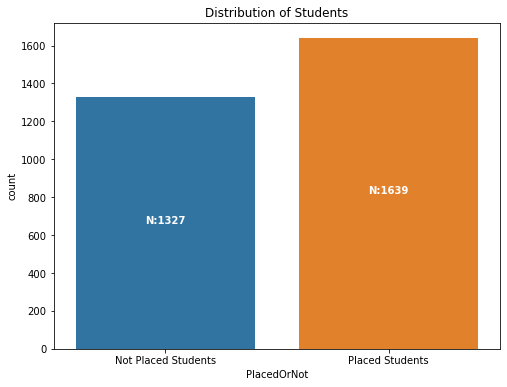

In [7]:
student_placed(df, 'PlacedOrNot' )

This data is not highly imbalanced data. However, students who are placed are outnumber the students who are not placed.

## Exploratory Data Analysis

Heatmap is created for the dataset showing 2D correlation matrix between two features.

<AxesSubplot:>

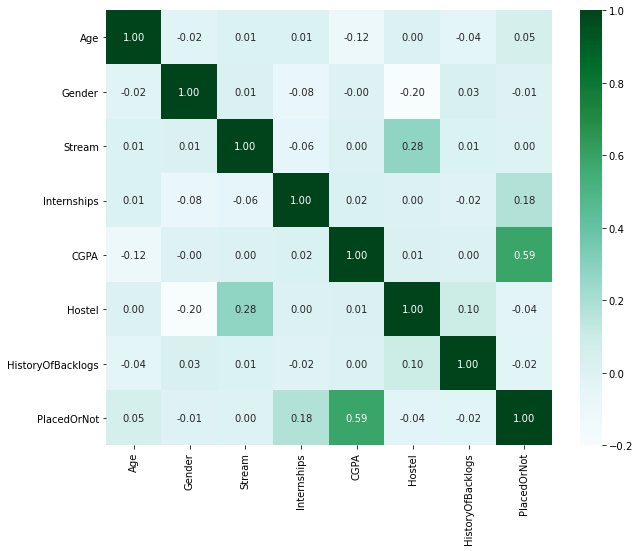

In [8]:
plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(), cmap = 'BuGn',annot=True, fmt='1.2f')

Observations from heatmap:<br>
•   PlacedOrNot and CGPA has highest value among others. That means high score ensures placement<br>
•	After CGPA, internships have high value of correlation with placedOrNot. Nevertheless, the value is still low.<br>
•	All the other features have very less correlation with PlacedOrNot.

No handles with labels found to put in legend.


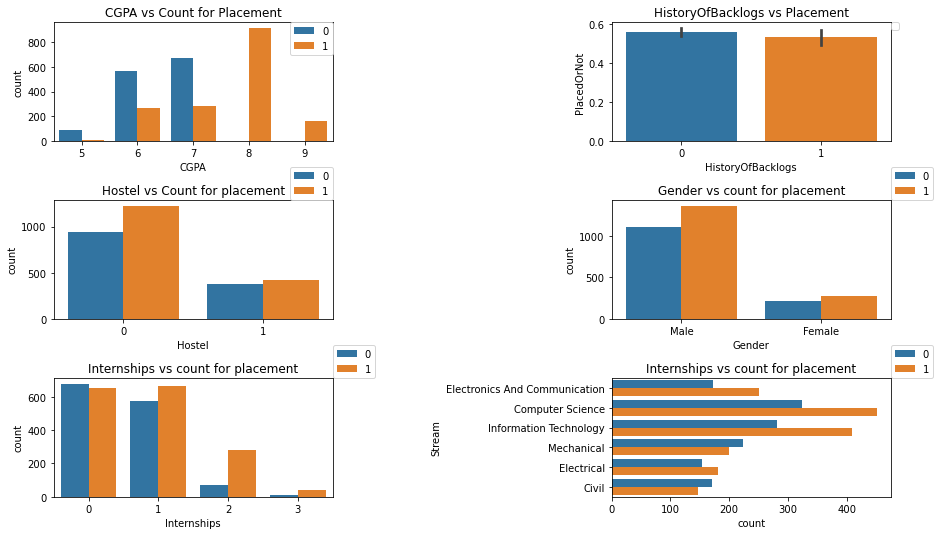

In [9]:
plt.figure(figsize=(15, 12))
plt.subplot(421)
sns.countplot(x='CGPA',data=df,hue='PlacedOrNot')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('CGPA vs Count for Placement')

plt.subplot(422)
sns.barplot(x='HistoryOfBacklogs',y='PlacedOrNot',data=df)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('HistoryOfBacklogs vs Placement')

plt.subplot(423)
sns.countplot(x='Hostel',data=df,hue='PlacedOrNot')
plt.legend(loc='lower right', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('Hostel vs Count for placement')

plt.subplot(424)
sns.countplot(x='Gender',data=df,hue='PlacedOrNot')
plt.legend(loc='lower left', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('Gender vs count for placement')

plt.subplot(425)
sns.countplot(x='Internships',data=df,hue='PlacedOrNot')
plt.legend(loc='lower left', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('Internships vs count for placement')

plt.subplot(426)
sns.countplot(y='Stream',data=df,hue='PlacedOrNot')
plt.legend(loc='lower left', bbox_to_anchor=(1, 1),borderaxespad=0)
plt.title('Internships vs count for placement')
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=1)


Observations from the above plots:<br>
• Placement of a student is highly dependent on CGPA. It shows all the students with higher CGPA i.e 8 and 9 got placed. So, if student desire to get placement, they should aim on scoring high.<br>
• We can see there is abnormal gender ratio where Female ratio is much lower than male. But Female seems more likely to get placement than male.<br>
• In streams, E&C, CS, IT and Electricals, placement number exceeds No placement.<br>
• Other features such as Internships, Hostel and HistoryOfBacklogs are almost equaly distributed for placement and no placement.<br>

#### Violin plot showing Placement versus CGPA for Male and Female Gender 

<AxesSubplot:xlabel='PlacedOrNot', ylabel='CGPA'>

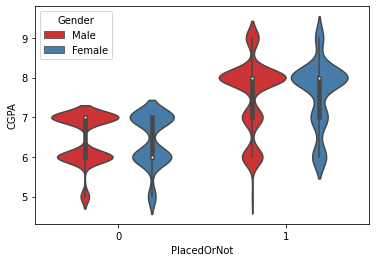

In [10]:
sns.violinplot(x="PlacedOrNot", y="CGPA", data=df,hue='Gender',palette='Set1')

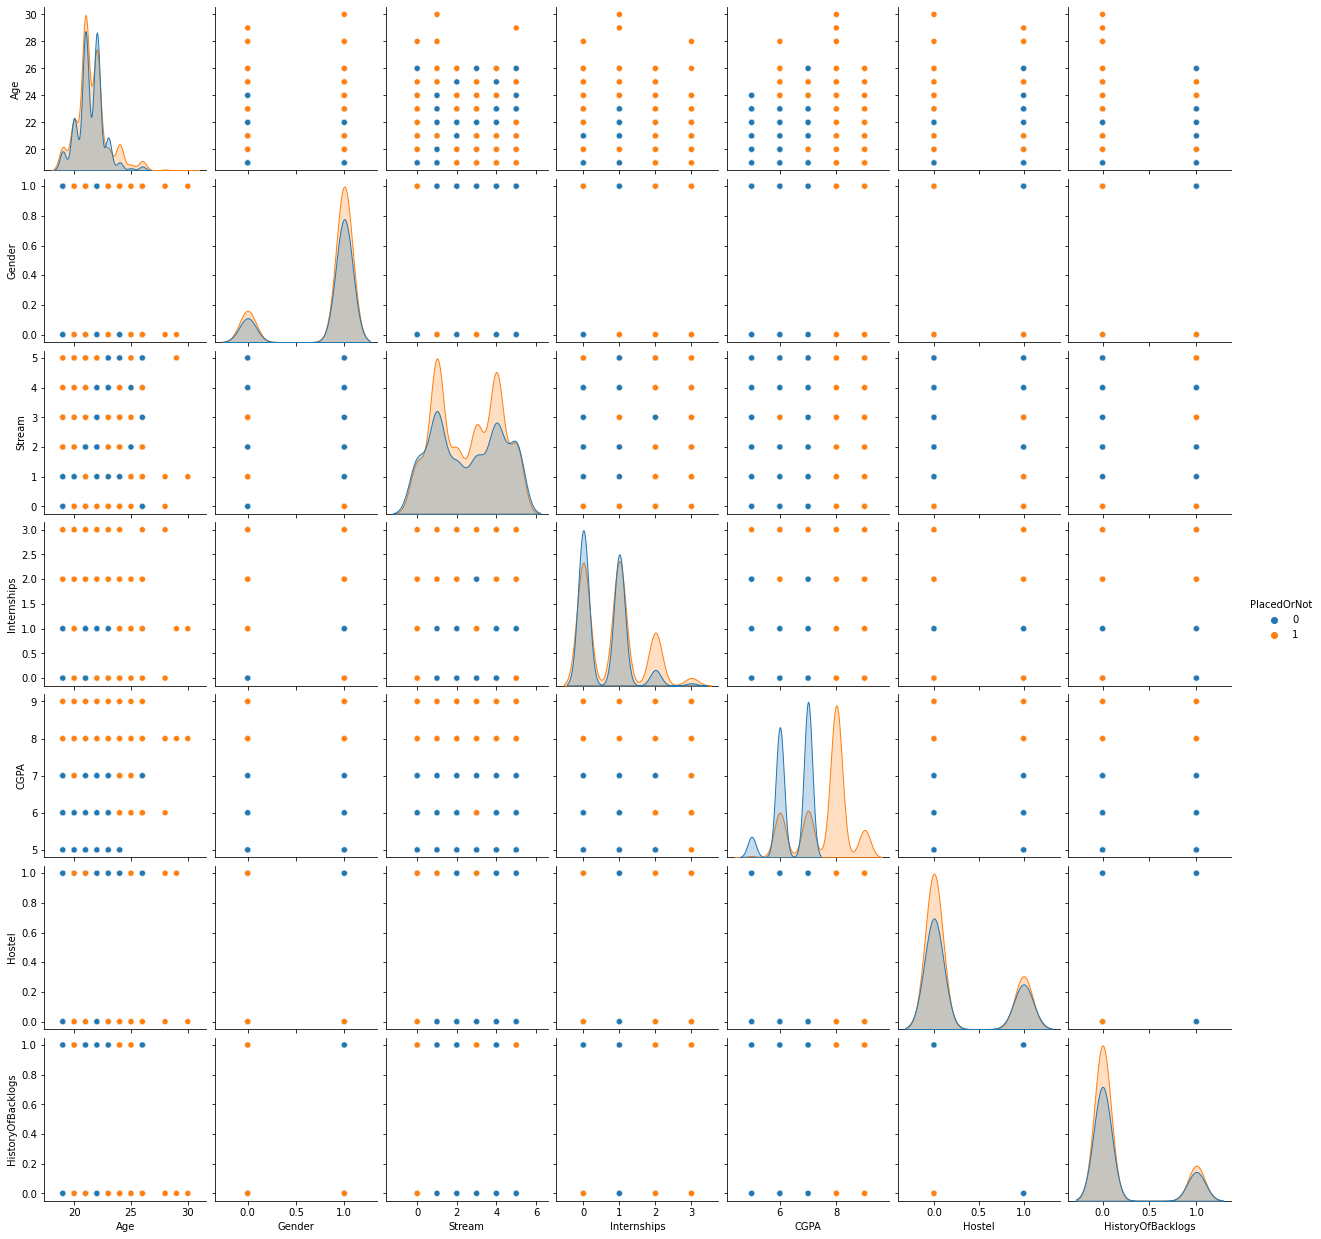

In [11]:
sns.pairplot(df1, hue='PlacedOrNot')

The above pair plot depicts the dataset is non-linear. Hence, we should avoid implementing linear classification models for prediction such as logistic regression, SVM, naive bayes. 

## Implementing KNN model for prediction

Test Train split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('PlacedOrNot',axis=1), df['PlacedOrNot'], test_size=0.33, random_state=42)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
pred = neigh.predict(X_test)

In [15]:
accuracy_score(y_test, pred)

0.8386108273748724

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       432
           1       0.88      0.82      0.85       547

    accuracy                           0.84       979
   macro avg       0.84      0.84      0.84       979
weighted avg       0.84      0.84      0.84       979



## Implementing Decision tree model for prediction

In [17]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
pred=DT.predict(X_test)
accuracy_score(y_test,pred)

0.874361593462717

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       432
           1       0.93      0.84      0.88       547

    accuracy                           0.87       979
   macro avg       0.87      0.88      0.87       979
weighted avg       0.88      0.87      0.87       979



## Implementing Random forest model for prediction

In [20]:
RF= RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
pred=RF.predict(X_test)
accuracy_score(y_test,pred)

0.8764044943820225

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       432
           1       0.93      0.84      0.88       547

    accuracy                           0.88       979
   macro avg       0.88      0.88      0.88       979
weighted avg       0.88      0.88      0.88       979



## Conclusion

Three models are implemented for the student placement prediction. They are KNN, Decision Tree, Random Forest, Among three Random Forest gets the highest accuracy of 88% with f1-score 0.87 and 0.88.

## Reference

https://www.kaggle.com/tejashvi14/engineering-placements-prediction